In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import dhlab as dh
import matplotlib.pyplot as plt

In [2]:
corpus = pd.read_csv('corpus_konsensus.csv', index_col = 0)

In [3]:
corpus['dhlabid'] = corpus.dhlabid.astype(int)

In [4]:
title_dict = corpus[['dhlabid','title']].set_index('dhlabid').to_dict()

# Konsensu

In [89]:
kons = pd.read_csv("urn_to_romance.csv", index_col=0)

In [90]:
kons

,counts,tag
urn,,
URN:NBN:no-nb_digibok_2011111605037,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2007082703001,"Counter({'z': 1, 'x': 1})",z-1#x-1
URN:NBN:no-nb_digibok_2009100812001,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2013110424054,Counter({'x': 1}),x-1
NaN,Counter({'x': 1}),x-1
...,...,...
URN:NBN:no-nb_digibok_2021082548053,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2021082548053,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2011062708033,Counter({'x': 1}),x-1


In [81]:
from collections import Counter

In [82]:
#eval(kons.iloc[0]['counts'])

Counter({'x': 1})

In [83]:
#kons['tag'] = kons['counts'].apply(lambda C: '#'.join([f"{x}-{str(eval(C)[x])}" for x in eval(C)]))

In [94]:
urn2tag = kons.reset_index().dropna(how='any', axis=0).set_index('urn').to_dict()['tag']

In [96]:
dhlab2urn = corpus[['dhlabid', 'urn']].set_index('dhlabid').to_dict()['urn']

In [98]:
dhlab2tag = {x:urn2tag.get(dhlab2urn[x]) for x in dhlab2urn}

# Analyse

In [5]:
counts = dh.Counts(corpus)

In [7]:
df = counts.frame.rename(columns=title_dict['title'])

In [101]:
df = counts.frame.rename(columns=dhlab2tag)

In [102]:
dft = df.transpose()*100/df.transpose().sum()

In [103]:
df = dft.transpose()

In [104]:
df

,x-1,x-1,x-1,x-2,x-3,x-1,z-1#x-1,x-1,x-1,x-1,...,x-1#x/y-1,x-1,w-1#x-1,x-1,x-1,x-1,x-1,x-2,x-1,x-1
",",0.403018,0.601782,1.040023,0.700973,0.071287,0.109179,0.276531,0.348962,0.352011,3.021641,...,0.681455,0.114364,0.787356,0.329215,0.324945,0.040790,1.837672,1.518750,0.362914,0.846215
.,0.226528,0.369073,0.898391,0.392799,0.037849,0.059880,0.202237,0.147629,0.475934,1.898277,...,0.372368,0.117971,0.487233,0.183877,0.179829,0.029281,1.386753,1.160320,0.447972,0.572534
og,0.655204,1.090994,1.391825,1.156956,0.047195,0.097977,0.423647,0.360721,0.249496,4.417796,...,0.772224,0.051610,1.062567,0.565783,0.523556,0.093285,2.185301,2.712444,0.802859,0.828250
i,0.484976,0.865846,1.729516,1.108516,0.061665,0.101566,0.269149,0.321382,0.247022,4.484482,...,0.621364,0.060939,1.261227,0.471192,0.305059,0.039175,2.336733,2.784710,0.716763,1.139348
!,1.821479,0.056773,0.244441,0.257057,0.250749,0.253903,0.996688,1.062924,4.223309,0.607160,...,4.081375,0.006308,0.228671,0.247595,0.143510,0.009462,2.772433,0.540924,0.195553,0.203438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
á,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
þá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
ÆLDSTE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
UDSEENDE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000


In [120]:
# Initialize PCA and set number of components to 5
pca = PCA(n_components=5)
X = df.head(200).values.T  # Take transpose to make the books as rows
X_pca = pca.fit_transform(X)

Explained variance by each component: [0.4086065  0.21537679 0.09277579 0.05968144 0.02605009]


Text(0, 0.5, 'Dimension 3 Principal Component')

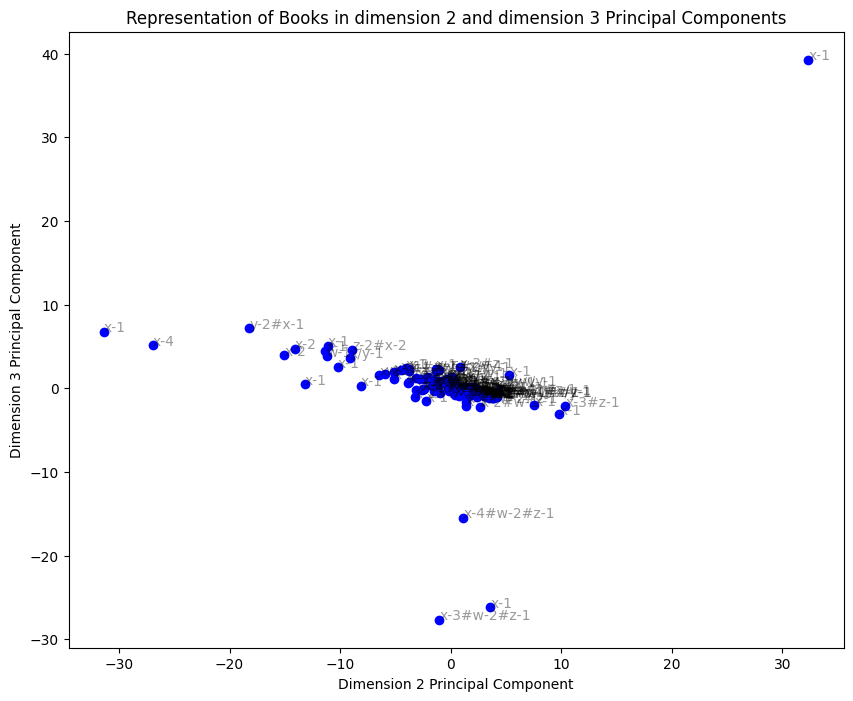

In [123]:
## Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)

dim1 = 2
dim2 = 3

# Plotting dimensions 2 and 3
x = X_pca[:, dim1]  # Second principal component
y = X_pca[:, dim2]  # Third principal component

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue')

# Label the points
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (x[i], y[i]), alpha=0.4)

# Add title and axis labels
plt.title(f'Representation of Books in dimension {dim1} and dimension {dim2} Principal Components')
plt.xlabel(f'Dimension {dim1} Principal Component')
plt.ylabel(f'Dimension {dim2} Principal Component')



In [107]:
## Krasjer ser det ut som....

from sklearn.metrics.pairwise import cosine_similarity

dtm = df.head(50)

In [108]:
dtm.columns = [f"{col} {i}" for i, col in enumerate(dtm.columns)]

In [109]:
dtm

,x-1 0,x-1 1,x-1 2,x-2 3,x-3 4,x-1 5,z-1#x-1 6,x-1 7,x-1 8,x-1 9,...,x-1#x/y-1 143,x-1 144,w-1#x-1 145,x-1 146,x-1 147,x-1 148,x-1 149,x-2 150,x-1 151,x-1 152
",",0.403018,0.601782,1.040023,0.700973,0.071287,0.109179,0.276531,0.348962,0.352011,3.021641,...,0.681455,0.114364,0.787356,0.329215,0.324945,0.040790,1.837672,1.518750,0.362914,0.846215
.,0.226528,0.369073,0.898391,0.392799,0.037849,0.059880,0.202237,0.147629,0.475934,1.898277,...,0.372368,0.117971,0.487233,0.183877,0.179829,0.029281,1.386753,1.160320,0.447972,0.572534
og,0.655204,1.090994,1.391825,1.156956,0.047195,0.097977,0.423647,0.360721,0.249496,4.417796,...,0.772224,0.051610,1.062567,0.565783,0.523556,0.093285,2.185301,2.712444,0.802859,0.828250
i,0.484976,0.865846,1.729516,1.108516,0.061665,0.101566,0.269149,0.321382,0.247022,4.484482,...,0.621364,0.060939,1.261227,0.471192,0.305059,0.039175,2.336733,2.784710,0.716763,1.139348
!,1.821479,0.056773,0.244441,0.257057,0.250749,0.253903,0.996688,1.062924,4.223309,0.607160,...,4.081375,0.006308,0.228671,0.247595,0.143510,0.009462,2.772433,0.540924,0.195553,0.203438
er,0.588227,0.834736,0.819237,1.008916,0.117350,0.104065,0.271603,0.341718,0.674579,1.374251,...,1.444366,0.042807,1.604523,0.484161,0.206654,0.094471,2.842972,3.701326,0.996369,0.784548
den,0.587561,0.810301,2.157102,1.150701,0.063640,0.155400,0.526141,0.363340,0.363340,6.825027,...,0.637141,0.044400,1.479261,0.574981,0.366300,0.037740,2.247382,3.980464,0.510601,1.141081
til,0.453037,1.259880,1.465184,1.075791,0.064328,0.123867,0.277160,0.164927,0.390077,6.094098,...,0.047220,0.079384,1.185971,0.297006,0.499572,0.043114,2.475278,2.820188,0.743884,0.854748
som,0.443604,1.016942,1.455664,1.201777,0.078119,0.080211,0.226685,0.291551,0.301316,5.235368,...,0.998807,0.083001,1.234559,0.433142,0.296434,0.094859,2.249409,3.712048,0.837687,0.802812
det,0.394445,0.979898,1.820465,1.459381,0.073263,0.091579,0.350618,0.228948,0.500415,3.474126,...,0.925605,0.070647,1.459381,0.353889,0.426498,0.097467,2.135106,3.777645,1.159132,0.966161


In [110]:
dtm[list(set(dtm.columns))].columns.is_unique

True

In [111]:
# Compute cosine similarity between all document pairs
cosine_sim = cosine_similarity(dtm.transpose())



In [112]:
cos_df = pd.DataFrame(cosine_sim, index=dtm.columns, columns=dtm.columns)


In [113]:
cos_df.sort_values(by=cos_df.columns[3], ascending=False).style.background_gradient()

In [118]:
cos_df[cos_df.columns[17]].sort_values(ascending=False).head(50)

x-4#w-2#z-1 17      1.000000
x-3#w-2#z-1 110     0.990435
x-1 86              0.858071
x-4#w-2#z-1 55      0.839833
x-2#w-1 133         0.835228
x-1 124             0.833877
x-1 77              0.797596
x-1 22              0.792990
x-2 73              0.769727
x-2#w-2#z-1 74      0.752024
x-1 144             0.715117
x-1 91              0.677795
x-3 90              0.675845
x-1 134             0.658179
x-1 2               0.643579
x-3 14              0.642502
x-2 21              0.639428
x-1 103             0.637199
x-1 123             0.633930
x-1 31              0.633135
x-1 65              0.632435
x-1 46              0.631164
x-2 24              0.628798
x-2 116             0.608745
w-2 118             0.606437
x-1 66              0.606007
x/y-1#x-1 60        0.605420
x-1 135             0.604216
x-2 3               0.601908
w-1 19              0.600985
x-1 61              0.599283
x-1 152             0.590404
w-1 26              0.589890
x-1 122             0.588247
x-1#w-1 30    